In [1]:
%matplotlib inline
from scipy.stats import gamma 
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import pyreadstat as prs

In [7]:
x = np.linspace(0,20,100)

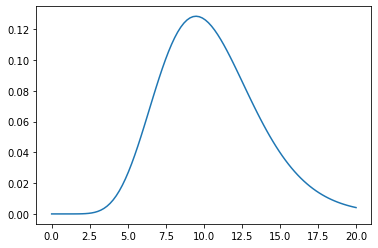

In [8]:
plt.plot(x,gamma.pdf(x,6.5/0.62));

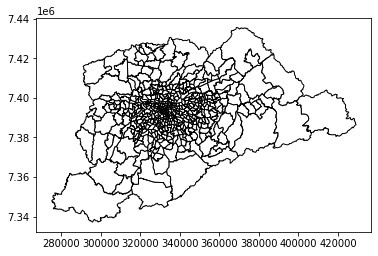

In [2]:
# Carregar mapa de zonas
gdf = gpd.read_file('Mapas/Shape/Zonas_2017_region.shp')
gdf.plot(color='white', edgecolor='black');

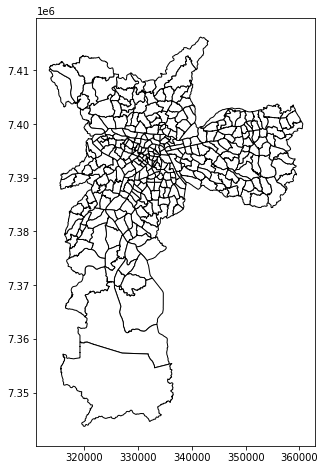

In [3]:
# Mostrar apenas cidade de São Paulo
gdf[gdf['NomeMunici'] == 'São Paulo'].plot(figsize=(5, 10),color='white', edgecolor='black');

In [4]:
# Pesquisa Origem-Destino 2017
df, meta = prs.read_sav('Banco de dados/OD_2017.sav')
print("Número de pessoas:", len(np.unique(df['id_pess']))) # acho que é isso
print("Número de domícilio:", len(np.unique(df['id_dom']))) 
print("Número de famílias:", len(np.unique(df['id_fam'])))
print("Número de viagens:", len(df)) 

Número de pessoas: 86318
Número de domícilio: 31847
Número de famílias: 32025


In [92]:
# descrição das colunas
meta.column_names_to_labels

{'zona': 'Zona de domicílio',
 'muni_dom': 'Município do domicílio',
 'co_dom_x': 'Coordenada X domicílio',
 'co_dom_y': 'Coordenada Y domicílio',
 'id_dom': 'Identifica domicílo',
 'f_dom': 'Identifica primeiro registro do domicílio',
 'fe_dom': 'Fator de expansão de domicílio',
 'dom': 'Número do domicílio',
 'cd_entre': 'Código da entrevista',
 'data': 'Data da entrevista',
 'tipo_dom': 'Tipo de domicílio',
 'agua': 'Possui água encanada?',
 'rua_pavi': 'A rua é pavimentada?',
 'no_morad': 'Total de moradores do domicílio',
 'tot_fam': 'Total de famílias no domicílio',
 'id_fam': 'Identifica família',
 'f_fam': 'Identifica primeiro registro da família',
 'fe_fam': 'Fator de expansão de família',
 'familia': 'Número da família',
 'no_moraf': 'Total de moradores na família',
 'condmora': 'Condição de moradia',
 'qt_banho': 'Quantidade de banheiros',
 'qt_empre': 'Quantidade de empregados domésticos',
 'qt_auto': 'Quantidade de automóveis',
 'qt_micro': 'Quantidade de microcomputadores

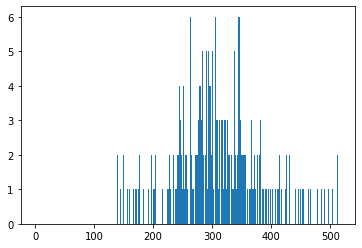

In [5]:
# gerar proporção de entrevistados em cada zona
#gdf['prop'] = np.random.random(size=len(gdf))
zonas = np.array(df['zona'], dtype='int')
tally=np.zeros(max(zonas),dtype='int')
for x in zonas:
     tally[x-1] += 1
plt.hist(tally,bins=range(1,518));
gdf['domicilio'] = tally

In [17]:
# Sanity checking
tally[81], len(df[df.zona == 82]) # no. de entrevistas com domicílio em Pinheiros

(504, 504)

In [18]:
tally[297], len(df[df.zona == 298]) # no. de entrevistas com domicílio em bairro que não sei o nome mas aparece como populoso no mapa abaixo

(956, 956)

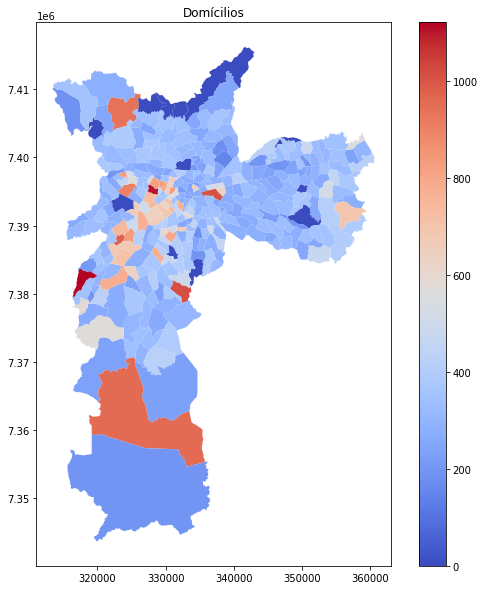

In [99]:
# Gerar proporções em cada zona
gdf[gdf['NomeMunici'] == 'São Paulo'].plot(column='domicilio', cmap='coolwarm', legend=True,figsize=(10, 10));
plt.title('Domícilios');

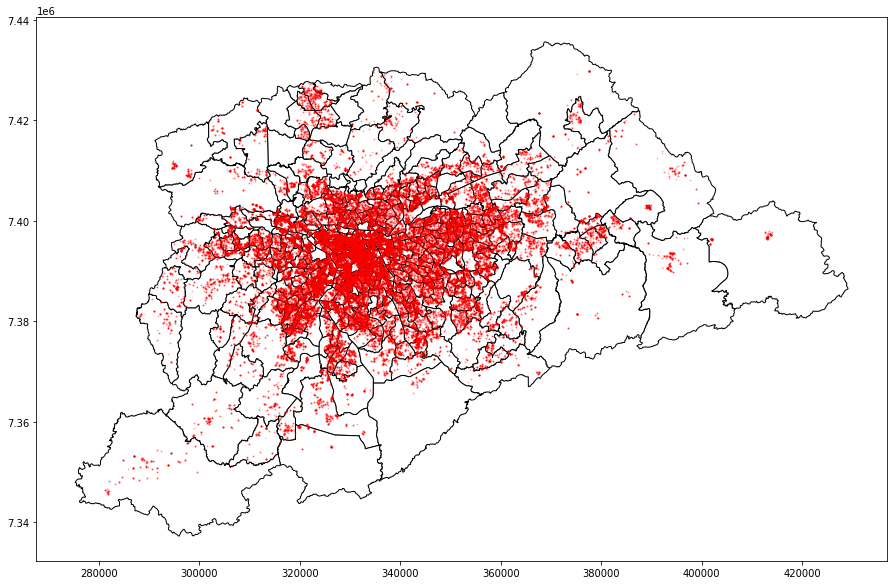

In [119]:
# Desenha posição de entrevistados no mapa
gdf_p = gpd.GeoDataFrame(
     df, geometry=gpd.points_from_xy(df.co_dom_x, df.co_dom_y))
ax = gdf.plot(figsize=(20, 10),color='white', edgecolor='black');
# We can now plot our ``GeoDataFrame``.
gdf_p.plot(ax=ax, color='red', markersize=1, alpha=0.1);

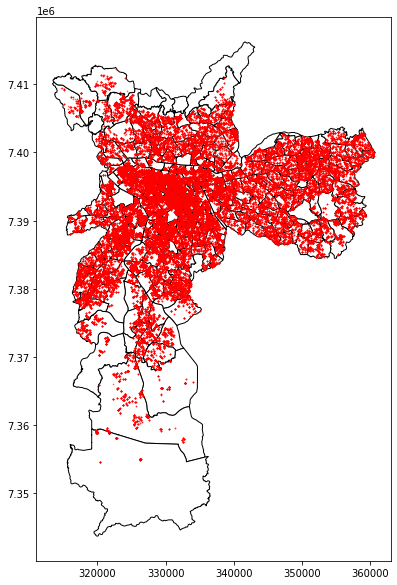

In [126]:
# Desenha posição de entrevistados no mapa com "jittering" apenas para a capital
latitude = df['co_dom_x']+np.random.normal(loc=0,scale=1000,size=len(df))
longitude = df['co_dom_y']++np.random.normal(loc=0,scale=1000,size=len(df))
gdf_p = gpd.GeoDataFrame(
     df, geometry=gpd.points_from_xy(df.co_dom_x, df.co_dom_y))
ax = gdf[gdf['NomeMunici'] == 'São Paulo'].plot(figsize=(20, 10),color='white', edgecolor='black');
# We can now plot our ``GeoDataFrame``.
gdf_p[gdf_p.muni_dom == 36].plot(ax=ax, color='red', markersize=0.5, alpha=0.5);

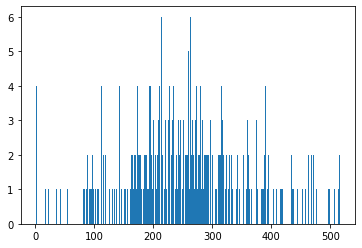

In [65]:
origens = np.array(df['zona_o'][~df['zona_o'].isnull()], dtype='int')
#print(np.unique(origens))
tally=np.zeros(max(origens),dtype='int')
for x in origens:
      tally[x-1] += 1
plt.hist(tally,bins=range(1,518));
gdf['origem'] = tally

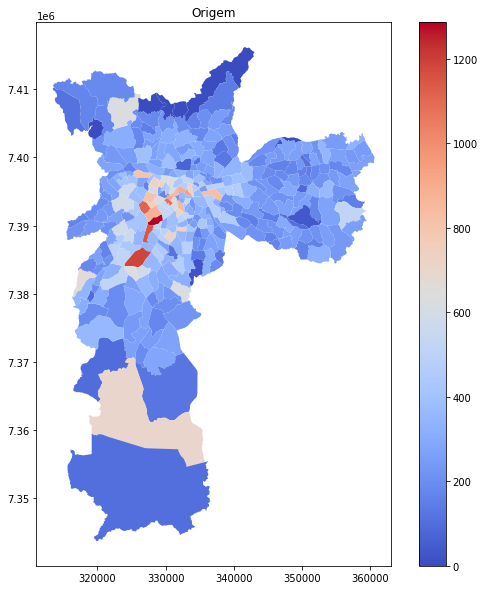

In [69]:
# Gerar proporções em cada zona
gdf[gdf['NomeMunici'] == 'São Paulo'].plot(column='origem', cmap='coolwarm', legend=True,figsize=(10, 10));
plt.title('Origem');

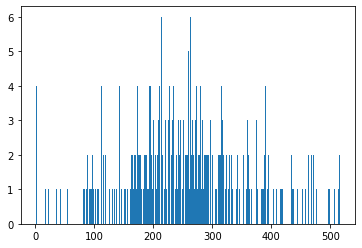

In [71]:
destinos = np.array(df['zona_d'][~df['zona_d'].isnull()], dtype='int')
#print(np.unique(origens))
tally=np.zeros(max(destinos),dtype='int')
for x in origens:
      tally[x-1] += 1
plt.hist(tally,bins=range(1,518));
gdf['destino'] = tally

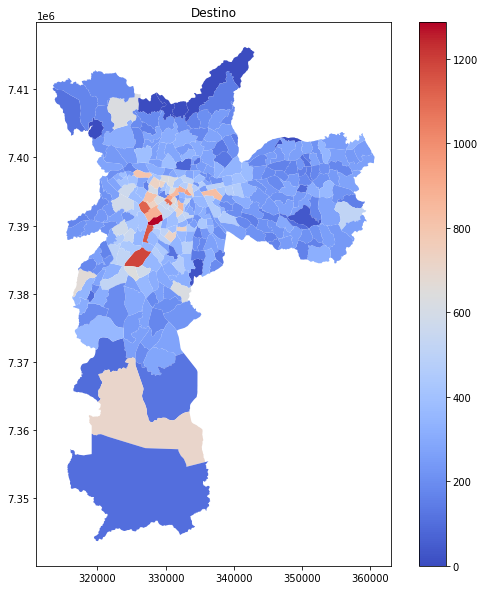

In [72]:
# Gerar proporções em cada zona
gdf[gdf['NomeMunici'] == 'São Paulo'].plot(column='destino', cmap='coolwarm', legend=True,figsize=(10, 10));
plt.title('Destino');

In [121]:
df.muni_dom

0         36.0
1         36.0
2         36.0
3         36.0
4         36.0
          ... 
183087    25.0
183088    25.0
183089    25.0
183090    25.0
183091    25.0
Name: muni_dom, Length: 183092, dtype: float64

In [100]:
df[['co_dom_x','co_dom_y']]

,co_dom_x,co_dom_y
0,333743.0,7394463.0
1,333743.0,7394463.0
2,333743.0,7394463.0
3,333743.0,7394463.0
4,333743.0,7394463.0
...,...,...
183087,294618.0,7410518.0
183088,295243.0,7411456.0
183089,295243.0,7411456.0
183090,295243.0,7411456.0


In [19]:
len(df)

183092